In [2]:
# Importing packages, modules.
import numpy as np
import qutip as qt

%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# define qubit basis states
psi0 = qt.basis(2,0)
psi1 = qt.basis(2,1)

# define single-qubit operators
s0 = qt.qeye(2)
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()
sp = sx + 1j * sy
sm = sx - 1j * sy

# define two-qubit operators
sp_A = qt.tensor(sp, s0)
sm_A = qt.tensor(sm, s0)
sp_B = qt.tensor(s0, sp)
sm_B = qt.tensor(s0, sm)

# define quantities to evaluate
M1 = psi1*psi1.dag() # |1><1| measurement operator

M_A_1 = qt.tensor(M1, s0) # excited population of qubit A 
M_B_1 = qt.tensor(s0, M1) # excited population of qubit B

In [20]:
# qubit parameters in the units of hbar
Delta = 0 # the difference in qubit frequencies of qubit A and B (omega_A-omega_B)
g     = 1 # coupling constant between the qubits

# define time axis
t_list = np.linspace(0, 10, 1001)

initial_state = qt.tensor(psi0,psi1) # start in the |01> state

### Qubits on resonance

In [21]:
# two-qubit Hamiltonian in the qubits frame
def H_coupled_qubits(t):
    
    H_1 = [-0.25 * g * sp_A * sm_B, np.exp(-1j*Delta*t)]  # operator-function pairs for the time-dependent part
    H_2 = [-0.25 * g * sm_A * sp_B, np.exp(+1j*Delta*t)]  # operator-function pairs for the time-dependent part
    
    H_full = [H_1, H_2]
           
    return H_full 

# solve numerically the full Rabi Hamiltonian without RWA
result = qt.mesolve(H_coupled_qubits(t_list), initial_state, t_list, e_ops=[M_A_1, M_B_1])

# calculate the expectation values of the measurement operators
dynamics_result = np.array(result.expect)

p_A_1 = dynamics_result[0]
p_B_1 = dynamics_result[1]



<IPython.core.display.Javascript object>


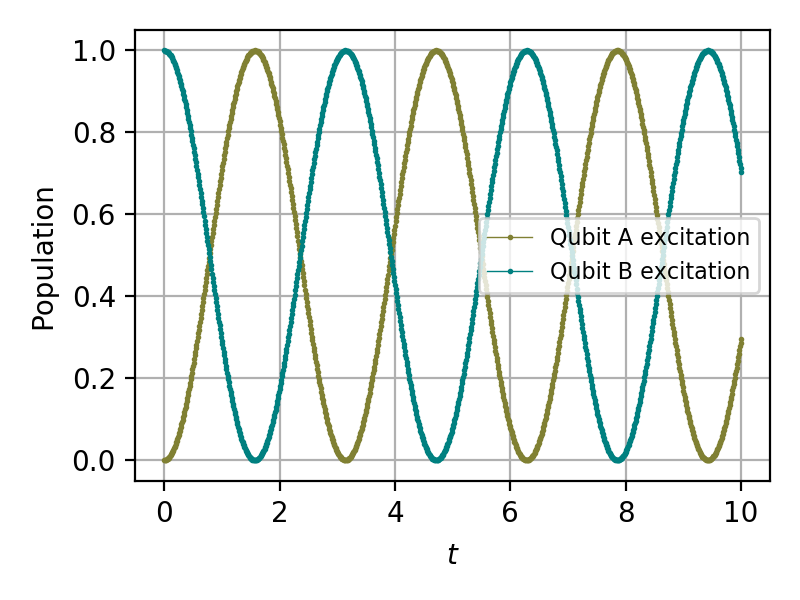

In [22]:
fig, axs = plt.subplots(figsize=(4, 3))

axs.plot(t_list, p_A_1, '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Qubit A excitation')

axs.plot(t_list, p_B_1, '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Qubit B excitation')

axs.set_xlabel(r"$t$", labelpad=5)
axs.set_ylabel("Population", labelpad=5)
axs.legend(loc='best', fontsize = 8)
axs.grid()

plt.tight_layout()
plt.show()


### Qubits off-resonant

In [25]:
Delta_list = np.linspace(-5,5,101)

excitation = np.zeros((2, len(Delta_list), len(t_list))) # initialize excitation matrix

for Delta_idx, Delta in enumerate(Delta_list):
    
    # solve numerically the full Rabi Hamiltonian without RWA
    result = qt.mesolve(H_coupled_qubits(t_list), initial_state, t_list, e_ops=[M_A_1, M_B_1])

    # calculate the expectation values of the measurement operators
    dynamics_result = np.array(result.expect)

    p_A_1 = dynamics_result[0]
    p_B_1 = dynamics_result[1]
    
    excitation[0,Delta_idx,:] = p_A_1
    excitation[1,Delta_idx,:] = p_B_1

<IPython.core.display.Javascript object>


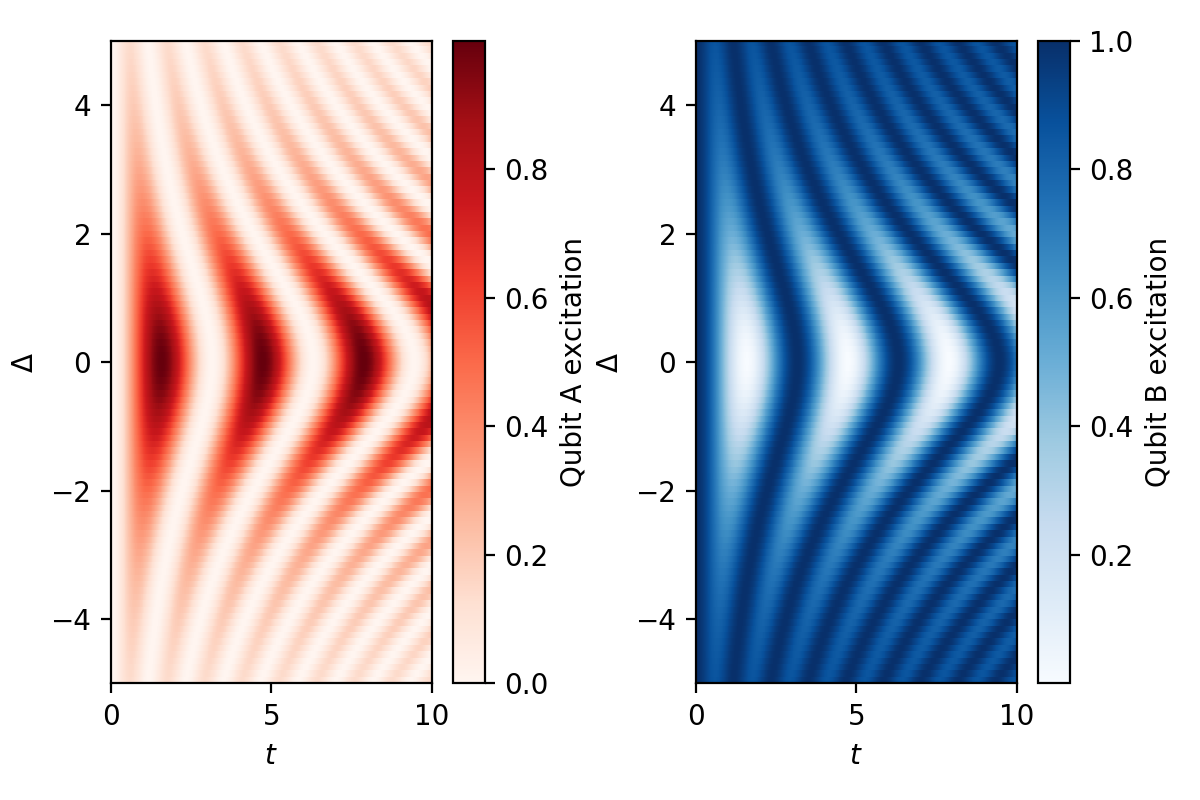

In [29]:
fig, axs = plt.subplots(figsize=(6,4), ncols=2)

im0 = axs[0].imshow(excitation[0,:,:], 
               extent = [t_list[0], t_list[-1], Delta_list[0], Delta_list[-1]],
               aspect = 2, cmap='Reds')

fig.colorbar(im0, ax=axs[0], label = r'Qubit A excitation')
axs[0].set_xlabel(r'$t$')
axs[0].set_ylabel(r'$\Delta$')

im1 = axs[1].imshow(excitation[1,:,:], 
               extent = [t_list[0], t_list[-1], Delta_list[0], Delta_list[-1]],
               aspect = 2, cmap='Blues')

fig.colorbar(im1, ax=axs[1], label = r'Qubit B excitation')
axs[1].set_xlabel(r'$t$')
axs[1].set_ylabel(r'$\Delta$')

plt.tight_layout()
plt.show()